In [14]:
import argparse
import tensorflow as tf
from collections import deque
import numpy as np
import sys
sys.path.insert(0,'/home/users/rmth/stroke-deep-learning') 
sys.path.insert(0,'/home/users/rmth/') 
from datahandler import DataHandler
from models import CRNN as Model
from config import Config
from models import input_fn
import os

os.chdir('/home/users/rmth/')

In [15]:
def serving_input_receiver_fn():
    '''
    Serving input receiver function for tf.Estimator.export_savedmodel
    :return: a TensorServingInputReceiver fitting the input data specified in cf.hparams
    '''
    features = tf.placeholder(shape=[None, cf.hparams.n_epoch_samples, cf.hparams.n_channels], dtype=tf.float32)
    receiver_tensors = features
    return tf.estimator.export.TensorServingInputReceiver(features, receiver_tensors)

In [16]:
cf = Config('c-shhs',
            'cluster',
            'revised2',
            None).get_configs(cross_validate=None)

DataHandler.setup_partitions(config=cf,
                                 model_memory=False,
                                 cross_validate=None)

Something is wrong with shhs1-202852


Something is wrong with shhs1-201652
Removing existing model: /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/


In [17]:
print(cf.hparams.optimizer)

<class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'>


In [18]:
run_config = tf.estimator.RunConfig(save_checkpoints_steps=cf.eparams.save_checkpoint_steps,
                                        save_summary_steps=cf.eparams.save_summary_steps)
model = Model('CRNN', cf.eparams)
classifier = tf.estimator.Estimator(
        model_fn=lambda features, labels, mode: model(features, labels, mode, cf.hparams),
        model_dir=cf.eparams.ckptdir,
        config=run_config)

tf.logging.set_verbosity(tf.logging.INFO)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': None, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe73c06a550>, '_evaluation_master': '', '_save_checkpoints_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/', '_global_id_in_cluster': 0, '_save_summary_steps': 100}


Doing iteration 0 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.


X: (?, 2, 60, 1, 625)


conv_block_1/conv1: (?, 8, 60, 1, 623)
conv_block_1/conv2: (?, 8, 60, 1, 621)
conv_block_1/pool: (?, 8, 60, 1, 310)
conv_block_2/conv1: (?, 16, 60, 1, 308)
conv_block_2/conv2: (?, 16, 60, 1, 306)
conv_block_2/pool: (?, 16, 60, 1, 152)
conv_block_3/conv1: (?, 32, 60, 1, 150)
conv_block_3/conv2: (?, 32, 60, 1, 148)
conv_block_3/pool: (?, 32, 60, 1, 73)


conv_block_4/conv1: (?, 64, 60, 1, 71)
conv_block_4/conv2: (?, 64, 60, 1, 69)
conv_block_4/pool: (?, 64, 60, 1, 34)
rnn_input: (?, 60, 2176)


rnn_output: (?, 60, 8)
dense_input: (?, 60, 8)
INFO:tensorflow:Scale of 0 disables regularizer.


network output: (?, 60, 64)
logits: (?, 2)


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 1 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.


INFO:tensorflow:loss = 0.7027056, step = 0


INFO:tensorflow:Mode: train, Step: 0000, loss: 0.7027, accuracy: 0.50


INFO:tensorflow:Mode: train, Step: 0025, loss: 0.6975, accuracy: 0.50


INFO:tensorflow:Mode: train, Step: 0050, loss: 0.6999, accuracy: 0.38


INFO:tensorflow:Mode: train, Step: 0075, loss: 0.6973, accuracy: 0.50


INFO:tensorflow:Saving checkpoints for 100 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.


INFO:tensorflow:Loss for final step: 0.68976307.


Evaluation:
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-05-26-00:31:20


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-100


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [10/100]


INFO:tensorflow:Evaluation [20/100]


INFO:tensorflow:Evaluation [30/100]


INFO:tensorflow:Evaluation [40/100]


INFO:tensorflow:Evaluation [50/100]


INFO:tensorflow:Evaluation [60/100]


INFO:tensorflow:Evaluation [70/100]


Reshuffling for: shhs1-201225


INFO:tensorflow:Evaluation [80/100]


INFO:tensorflow:Evaluation [90/100]


INFO:tensorflow:Evaluation [100/100]


INFO:tensorflow:Finished evaluation at 2018-05-26-00:31:41


INFO:tensorflow:Saving dict for global step 100: accuracy = 0.5075, auc = 0.5075, global_step = 100, loss = 0.69361436, precision = 0.5040107, recall = 0.9425, sens_at_spec = 0.0, spec_at_sens = 0.0725


Evaluational loss result: 0.69361436367.
Loss  deque: deque([0.6936143636703491, 0.6936143636703491, 0.6936143636703491, 0.6936143636703491, 0.69361436])
Smoothed loss values: [0.69361436 0.69361436]


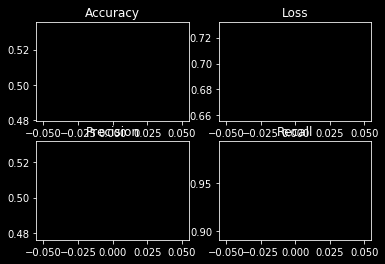

Doing iteration 1 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-100


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 101 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.


INFO:tensorflow:loss = 0.69343495, step = 100


INFO:tensorflow:Mode: train, Step: 0100, loss: 0.6934, accuracy: 0.50


INFO:tensorflow:Mode: train, Step: 0125, loss: 0.6865, accuracy: 0.50


INFO:tensorflow:Mode: train, Step: 0150, loss: 0.7011, accuracy: 0.50


INFO:tensorflow:Mode: train, Step: 0175, loss: 0.6897, accuracy: 0.50


INFO:tensorflow:Saving checkpoints for 200 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.


INFO:tensorflow:Loss for final step: 0.69519436.


Evaluation:
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-05-26-00:32:19


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


Reshuffling for: shhs1-202578
Reshuffling for: shhs1-203082


Reshuffling for: shhs1-201530


INFO:tensorflow:Evaluation [10/100]


Reshuffling for: shhs1-201703


INFO:tensorflow:Evaluation [20/100]


Reshuffling for: shhs1-201548


Reshuffling for: shhs1-205709


INFO:tensorflow:Evaluation [30/100]


Reshuffling for: shhs1-204225


Reshuffling for: shhs1-201528
INFO:tensorflow:Evaluation [40/100]


Reshuffling for: shhs1-201225


INFO:tensorflow:Evaluation [50/100]


INFO:tensorflow:Evaluation [60/100]


INFO:tensorflow:Evaluation [70/100]


INFO:tensorflow:Evaluation [80/100]


INFO:tensorflow:Evaluation [90/100]


INFO:tensorflow:Evaluation [100/100]


INFO:tensorflow:Finished evaluation at 2018-05-26-00:32:40


INFO:tensorflow:Saving dict for global step 200: accuracy = 0.5025, auc = 0.5025, global_step = 200, loss = 0.69315374, precision = 0.50135136, recall = 0.9275, sens_at_spec = 0.0, spec_at_sens = 0.0775


Evaluational loss result: 0.693153738976.
Loss  deque: deque([0.6936143636703491, 0.6936143636703491, 0.6936143636703491, 0.69361436, 0.69315374])
Smoothed loss values: [0.69361436 0.69352224]


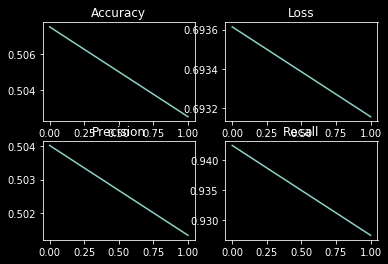

Doing iteration 2 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


Reshuffling for: shhs1-201050


INFO:tensorflow:Saving checkpoints for 201 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.


INFO:tensorflow:loss = 0.6829275, step = 200


INFO:tensorflow:Mode: train, Step: 0200, loss: 0.6829, accuracy: 0.50


Reshuffling for: shhs1-201050


INFO:tensorflow:Mode: train, Step: 0225, loss: 0.6959, accuracy: 0.50


INFO:tensorflow:Mode: train, Step: 0250, loss: 0.6914, accuracy: 0.38


INFO:tensorflow:Mode: train, Step: 0275, loss: 0.6903, accuracy: 0.50


INFO:tensorflow:Saving checkpoints for 300 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.


INFO:tensorflow:Loss for final step: 0.6958988.


Evaluation:
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-05-26-00:33:18


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-300


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


Reshuffling for: shhs1-201033


Reshuffling for: shhs1-203082


INFO:tensorflow:Evaluation [10/100]


Reshuffling for: shhs1-202578


Reshuffling for: shhs1-201225


INFO:tensorflow:Evaluation [20/100]


INFO:tensorflow:Evaluation [30/100]


INFO:tensorflow:Evaluation [40/100]


INFO:tensorflow:Evaluation [50/100]


Reshuffling for: shhs1-201530


INFO:tensorflow:Evaluation [60/100]


INFO:tensorflow:Evaluation [70/100]


INFO:tensorflow:Evaluation [80/100]


Reshuffling for: shhs1-201703


INFO:tensorflow:Evaluation [90/100]


INFO:tensorflow:Evaluation [100/100]


INFO:tensorflow:Finished evaluation at 2018-05-26-00:33:39


INFO:tensorflow:Saving dict for global step 300: accuracy = 0.50625, auc = 0.50625, global_step = 300, loss = 0.6939286, precision = 0.50341064, recall = 0.9225, sens_at_spec = 0.0, spec_at_sens = 0.09


Evaluational loss result: 0.693928599358.
Loss  deque: deque([0.6936143636703491, 0.6936143636703491, 0.69361436, 0.69315374, 0.6939286])
Smoothed loss values: [0.69352224 0.69358509]


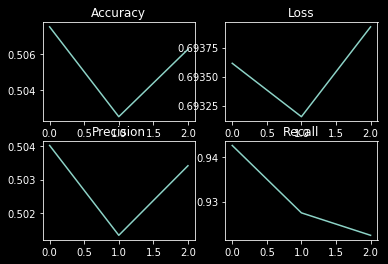

Doing iteration 3 of train and eval steps.
Training:
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-300


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


Reshuffling for: shhs1-201050


INFO:tensorflow:Saving checkpoints for 301 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.


INFO:tensorflow:loss = 0.68717134, step = 300


INFO:tensorflow:Mode: train, Step: 0300, loss: 0.6872, accuracy: 0.62


INFO:tensorflow:Mode: train, Step: 0325, loss: 0.6904, accuracy: 0.50


INFO:tensorflow:Mode: train, Step: 0350, loss: 0.6966, accuracy: 0.38


INFO:tensorflow:Mode: train, Step: 0375, loss: 0.6762, accuracy: 0.75


INFO:tensorflow:Saving checkpoints for 400 into /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt.


INFO:tensorflow:Loss for final step: 0.69033676.


Evaluation:
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Scale of 0 disables regularizer.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2018-05-26-00:34:18


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /scratch/users/rmth/tf_logs/c-shhs_cluster_revised2/model.ckpt-400


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


Reshuffling for: shhs1-205709
Reshuffling for: shhs1-201548


Reshuffling for: shhs1-204225


Reshuffling for: shhs1-201528


Reshuffling for: shhs1-201225


INFO:tensorflow:Evaluation [10/100]


INFO:tensorflow:Evaluation [20/100]


INFO:tensorflow:Evaluation [30/100]


Reshuffling for: shhs1-203082


INFO:tensorflow:Evaluation [40/100]


Reshuffling for: shhs1-202578


INFO:tensorflow:Evaluation [50/100]


INFO:tensorflow:Evaluation [60/100]


INFO:tensorflow:Evaluation [70/100]


INFO:tensorflow:Evaluation [80/100]


INFO:tensorflow:Evaluation [90/100]


Reshuffling for: shhs1-201033


INFO:tensorflow:Evaluation [100/100]


INFO:tensorflow:Finished evaluation at 2018-05-26-00:34:38


INFO:tensorflow:Saving dict for global step 400: accuracy = 0.51625, auc = 0.51625, global_step = 400, loss = 0.6931634, precision = 0.5088677, recall = 0.9325, sens_at_spec = 0.0, spec_at_sens = 0.1


Evaluational loss result: 0.693163394928.
Loss  deque: deque([0.6936143636703491, 0.69361436, 0.69315374, 0.6939286, 0.6931634])
Smoothed loss values: [0.69358509 0.69349489]


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
loss_buffer_size = 5
smoothed_loss_values = np.ones([2])

test_accuracies = []
test_losses = []
test_precision = []
test_recall = []

tolerance = 1e-2
early_stop_criterion = False
iteration = 0
max_steps = 1e4
train_steps = 100
eval_steps = 100
min_iterations = 10
max_iterations = max_steps // train_steps
while True:
    print('Doing iteration {} of train and eval steps.'.format(iteration))
    
    print('Training:')
    classifier.train(input_fn=lambda: input_fn('train', cf.eparams), steps=train_steps)
    
    print('Evaluation:')
    eval_results = classifier.evaluate(input_fn=lambda: input_fn('val', cf.eparams), steps=eval_steps)
    print('Evaluational loss result: {}.'.format(eval_results['loss']))

    if iteration == 0:
        l = deque(eval_results['loss']*np.ones([loss_buffer_size]))
    
    test_accuracies.append(eval_results['accuracy'])
    test_losses.append(eval_results['loss'])
    test_precision.append(eval_results['precision'])
    test_recall.append(eval_results['recall'])
    
    smoothed_loss_values[0] = np.mean(l)
    l.popleft()
    l.append(eval_results['loss'])
    smoothed_loss_values[1] = np.mean(l)
    iteration += 1
    
    print('Loss  deque: {}'.format(l))
    print('Smoothed loss values: {}'.format(smoothed_loss_values))
    
    fig, ax = plt.subplots(2, 2)
    ax[0, 0].plot(test_accuracies)
    ax[0, 0].set_title('Accuracy')
    ax[0, 1].plot(test_losses)
    ax[0, 1].set_title('Loss')
    ax[1, 0].plot(test_precision)
    ax[1, 0].set_title('Precision')
    ax[1, 1].plot(test_recall)
    ax[1, 1].set_title('Recall')
    plt.show()
    if iteration < min_iterations:
        continue
    if iteration > max_iterations:
        test_mean_accuracy = np.mean(test_accuracies[-10:])
        if test_mean_accuracy < 0.5:
            print('Accuracy is below 50 % ({}).'.format(test_mean_accuracy))
            cf = Config('c-shhs',
                'cluster',
                'small',
                None).get_configs(cross_validate=None)

            DataHandler.setup_partitions(config=cf,
                                             model_memory=False,
                                             cross_validate=None)
            
            classifier = tf.estimator.Estimator(
                model_fn=lambda features, labels, mode: model(features, labels, mode, cf.hparams),
                model_dir=cf.eparams.ckptdir,
                config=run_config)
            iteration = 0
            test_accuracies = []
            test_losses = []
            test_precision = []
            test_recall = []
            print('****************Restarting****************')
            continue
        print('Reached maximum iterations.')
        break
    early_stop_criterion = (smoothed_loss_values[0]-smoothed_loss_values[1]) < tolerance
    if early_stop_criterion:
        print('Reached early stopping criterion at {} iterations.'.format(iteration))
    